In [1]:
import glob
import os

from astropy.time import Time
import astropy.units as u
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd 
import scipy.stats as st
from sklearn.neighbors import KernelDensity
import sunpy.coordinates.sun as sn

import huxt as H
import huxt_analysis as HA
import sir_huxt_mono_obs as sir


mpl.rc("axes", labelsize=16)
mpl.rc("ytick", labelsize=16)
mpl.rc("xtick", labelsize=16)
mpl.rc("legend", fontsize=16)


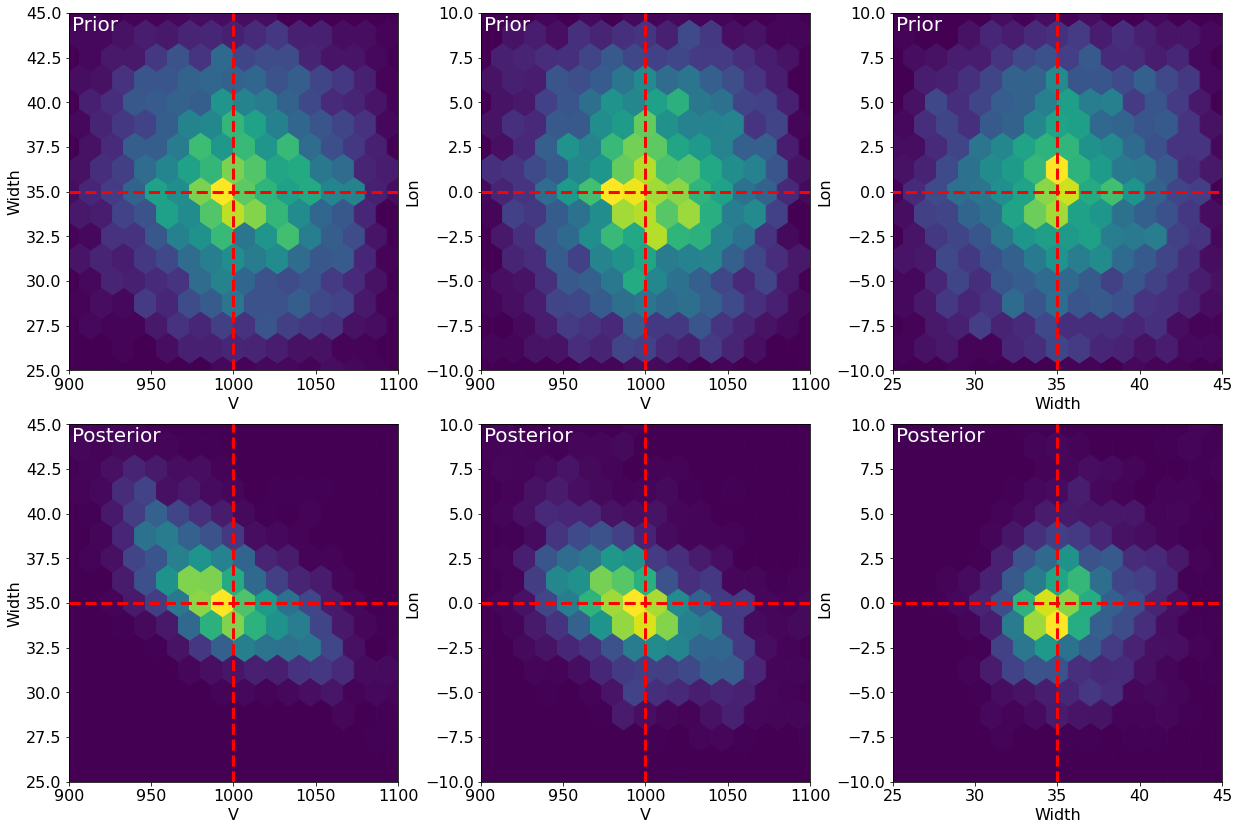

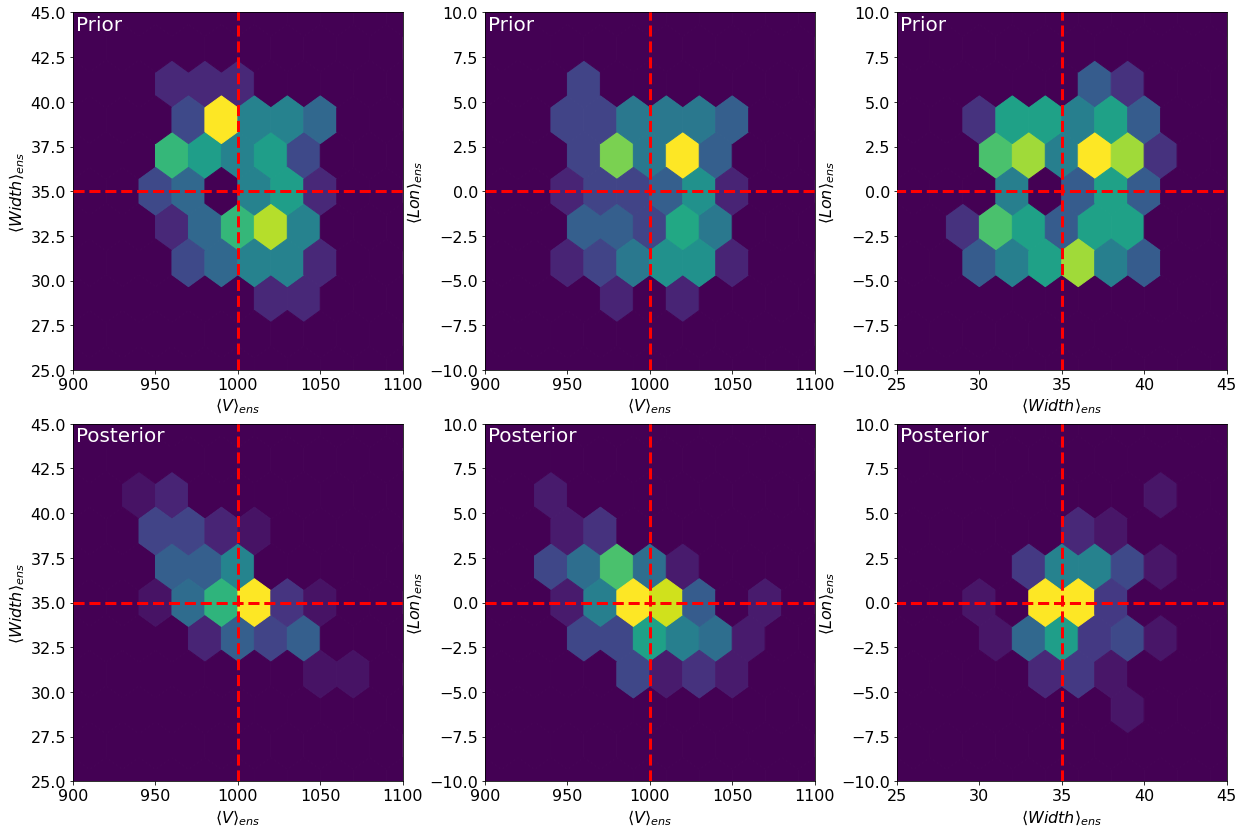

In [72]:
fig1, ax1 = plt.subplots(2, 3, figsize=(18, 12))
fig2, ax2 = plt.subplots(2, 3, figsize=(18, 12))

dirs = sir.get_project_dirs()
data_dir = os.path.join(dirs['sir_analysis'], "shvwl_calibrate_v3", "SIR_HUXt_*.hdf5")
files = glob.glob(data_dir)

for i, key in enumerate(['prior', 'post']):

    if key == 'prior':
        analysis_key = 'analysis_00'
        fmt = 'k.'
        z=2
    elif key == 'post':
        analysis_key = 'analysis_07'
        fmt = 'r.'
        z=3
        
    v_bin = []
    width_bin = []
    lon_bin = []
    
    v_avg_bin = []
    width_avg_bin = []
    lon_avg_bin = []
    for f in files: 

        out_file = h5py.File(f, 'r')
        
        cme_truth_params = out_file['truth_cme_params'][:]
        lon_truth = np.rad2deg(cme_truth_params[1])
        width_truth = np.rad2deg(cme_truth_params[3])
        v_truth = cme_truth_params[4]
        w = out_file[analysis_key]['weight'][()]
        id_best = np.argmax(w)
        
        if lon_truth > 180:
            lon_truth -= 360
        
        vf = out_file[analysis_key]['v'][:]
        v_bin.append(vf)
        v_avg_bin.append(np.mean(vf))
        wf= out_file[analysis_key]['width'][:]
        width_bin.append(wf)
        width_avg_bin.append(np.mean(wf))
        lf = out_file[analysis_key]['lon'][:]
        lf[lf>180] -= 360
        lon_bin.append(lf)
        lon_avg_bin.append(np.mean(lf))
        
        out_file.close()
        
    v_bin = np.array(v_bin).ravel()
    width_bin = np.array(width_bin).ravel()
    lon_bin = np.array(lon_bin).ravel()    
    
    v_avg_bin = np.array(v_avg_bin).ravel()
    width_avg_bin = np.array(width_avg_bin).ravel()
    lon_avg_bin = np.array(lon_avg_bin).ravel()    
    
    vwlims = (900, 1100, 25, 45)
    vllims = (900, 1100, -10, 10)
    wllims = (25, 45, -10, 10)
    ax1[i, 0].hexbin(v_bin, width_bin, gridsize=15, extent=vwlims)
    ax1[i, 1].hexbin(v_bin, lon_bin, gridsize=15, extent=vllims)
    ax1[i, 2].hexbin(width_bin, lon_bin, gridsize=15, extent=wllims)
    
    ax2[i, 0].hexbin(v_avg_bin, width_avg_bin, gridsize=10, extent=vwlims)
    ax2[i, 1].hexbin(v_avg_bin, lon_avg_bin, gridsize=10, extent=vllims)
    ax2[i, 2].hexbin(width_avg_bin, lon_avg_bin, gridsize=10, extent=wllims)

##############################
# FORMAT AXIS1

for a in ax1[:,0]:
    a.vlines(v_truth, vwlims[2], vwlims[3], zorder=9, linestyle=['--'], colors=['r'], linewidth=3)
    a.hlines(width_truth, vwlims[0], vwlims[1], zorder=9, linestyle=['--'], colors=['r'], linewidth=3)
    a.set_xlim(vwlims[0], vwlims[1])
    a.set_ylim(vwlims[2], vwlims[3]) 
    a.set_xlabel('V')
    a.set_ylabel('Width')

for a in ax1[:, 1]:
    a.vlines(v_truth, -10, 10, zorder=9, linestyle=['--'], colors=['r'], linewidth=3)
    a.hlines(lon_truth, 900, 1100, zorder=9, linestyle=['--'], colors=['r'], linewidth=3)
    a.set_xlim(900, 1100)
    a.set_ylim(-10, 10)
    a.set_xlabel('V')
    a.set_ylabel('Lon')

for a in ax1[:, 2]:
    a.vlines(width_truth, -10, 10, zorder=9, linestyle=['--'], colors=['r'], linewidth=3)
    a.hlines(lon_truth, 20, 50, zorder=9, linestyle=['--'], colors=['r'], linewidth=3)
    a.set_xlim(25, 45)
    a.set_ylim(-10, 10)
    a.set_xlabel('Width')
    a.set_ylabel('Lon')
    
labels = ['Prior', 'Posterior']
for i, lab in enumerate(labels):
    for j in range(ax1.shape[1]):
        ax1[i, j].text(0.01, 0.95, lab, fontsize=20, color='w', transform=ax1[i, j].transAxes)


fig1.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=0.99, wspace=0.25, hspace=0.15)

##############################
# FORMAT AXIS2

for a in ax2[:,0]:
    a.vlines(v_truth, vwlims[2], vwlims[3], zorder=9, linestyle=['--'], colors=['r'], linewidth=3)
    a.hlines(width_truth, vwlims[0], vwlims[1], zorder=9, linestyle=['--'], colors=['r'], linewidth=3)
    a.set_xlim(vwlims[0], vwlims[1])
    a.set_ylim(vwlims[2], vwlims[3]) 
    a.set_xlabel('$\\langle V \\rangle_{{ens}}$')
    a.set_ylabel('$\\langle Width \\rangle_{{ens}}$')

for a in ax2[:, 1]:
    a.vlines(v_truth, -10, 10, zorder=9, linestyle=['--'], colors=['r'], linewidth=3)
    a.hlines(lon_truth, 900, 1100, zorder=9, linestyle=['--'], colors=['r'], linewidth=3)
    a.set_xlim(900, 1100)
    a.set_ylim(-10, 10)
    a.set_xlabel('$\\langle V \\rangle_{{ens}}$')
    a.set_ylabel('$\\langle Lon \\rangle_{{ens}}$')

for a in ax2[:, 2]:
    a.vlines(width_truth, -10, 10, zorder=9, linestyle=['--'], colors=['r'], linewidth=3)
    a.hlines(lon_truth, 20, 50, zorder=9, linestyle=['--'], colors=['r'], linewidth=3)
    a.set_xlim(25, 45)
    a.set_ylim(-10, 10)
    a.set_xlabel('$\\langle Width \\rangle_{{ens}}$')
    a.set_ylabel('$\\langle Lon \\rangle_{{ens}}$')
    
labels = ['Prior', 'Posterior']
for i, lab in enumerate(labels):
    for j in range(ax2.shape[1]):
        ax2[i, j].text(0.01, 0.95, lab, fontsize=20, color='w', transform=ax2[i, j].transAxes)


fig2.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=0.99, wspace=0.25, hspace=0.15)

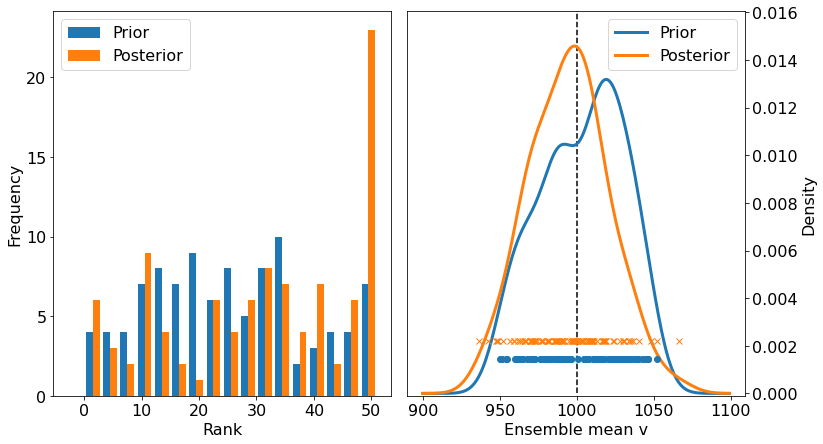

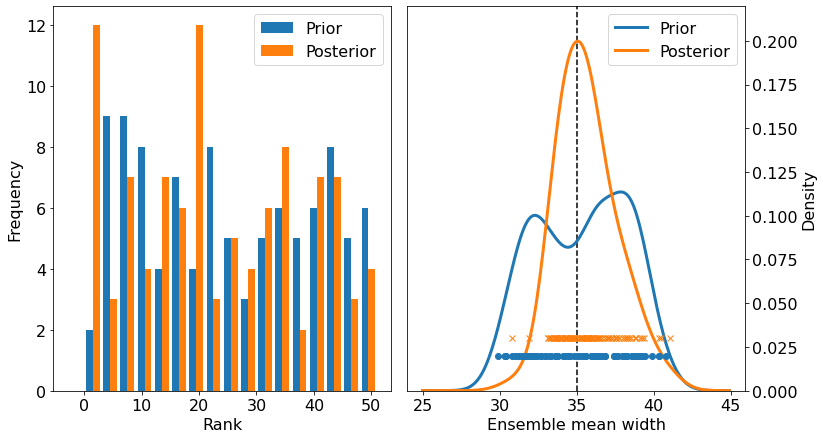

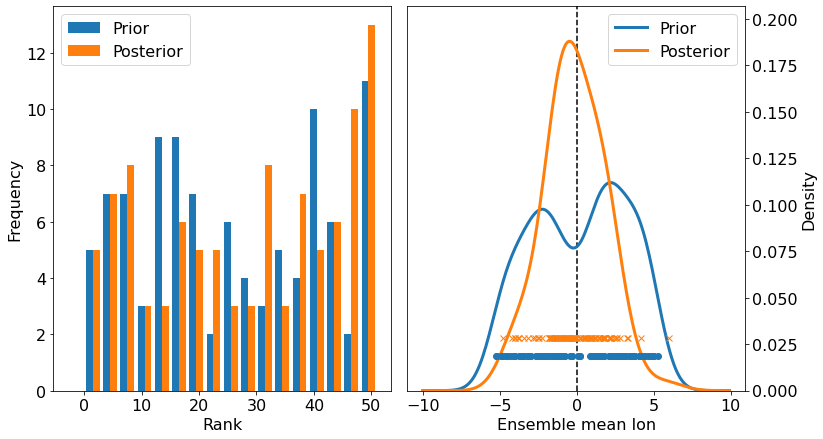

In [73]:
dirs = sir.get_project_dirs()
data_dir = os.path.join(dirs['sir_analysis'], "shvwl_calibrate_v3", "SIR_HUXt_*.hdf5")
files = glob.glob(data_dir)
#files = files[:-1]

# Get ranks and ensemble means of the priors
v_rank_prior = [] 
v_avg_prior = []

ess_prior = []

params = ['v_truth', 'v_avg', 'v_rank', 'v_std',
          'width_truth', 'width_avg', 'width_rank', 'width_std',
          'lon_truth', 'lon_avg', 'lon_rank', 'lon_std',
          'ess']

data = {key: {param_key:[] for param_key in params} for key in ['prior', 'post']}

for key in ['prior', 'post']:

    if key == 'prior':
        analysis_key = 'analysis_00'
    elif key == 'post':
        analysis_key = 'analysis_07'
        
    for f in files: 

        out_file = h5py.File(f, 'r')
        
        cme_truth_params = out_file['truth_cme_params'][:]
        data[key]['lon_truth'] = np.rad2deg(cme_truth_params[1])
        data[key]['width_truth'] = np.rad2deg(cme_truth_params[3])
        data[key]['v_truth'] = cme_truth_params[4]
        
        w = out_file[analysis_key]['weight'][()]
        ess = 1 / np.sum(w**2)
        data[key]['ess'].append(ess)
        
        if data[key]['lon_truth'] > 180:
            data[key]['lon_truth'] -= 360
        
        for param in ['v', 'lon', 'width']:
        
            # Rank the truth amongst prior ensemble
            # Speed first
            vals = out_file[analysis_key][param][:]
            n_ens = len(vals)
            if param == 'lon':
                vals[vals>180] -= 360
                
            val_truth = data[key][param + '_truth']
            vals_all = np.append(vals, val_truth)
            vals_ranks = st.rankdata(vals_all)
            data[key][param + '_rank'].append(vals_ranks[-1])
            # Ensemble mean of prior
            data[key][param + '_avg'].append(np.mean(vals))
            data[key][param + '_std'].append(np.std(vals))
        
        out_file.close()
        
# Produce rank-histograms and dist of ensemble mean
bins = np.arange(-3, n_ens + 3, 3)
bw = {'v':10, 'lon':1, 'width':1}
grid =  {'v':np.arange(900, 1100, 1), 'lon':np.arange(-10, 10, 0.1), 'width':np.arange(25, 45, 0.1)}
for param in ['v', 'width', 'lon']:
    
    ranks = [data['prior'][param + '_rank'], data['post'][param + '_rank']]
    val_pri = data['prior'][param + '_avg']
    val_pos = data['post'][param + '_avg']
    val_truth = data['prior'][param + '_truth']         
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    
    ax[0].hist(ranks, bins=bins, label=['Prior', 'Posterior'])
    
    cmap = plt.get_cmap("tab10")
    
    for val, col, label in zip([val_pri, val_pos], [cmap(0), cmap(1)], ['Prior', 'Posterior']):
        
        kde = KernelDensity(kernel='gaussian', bandwidth=bw[param]).fit(np.array(val).reshape(-1, 1))
        log_pdf = kde.score_samples(grid[param].reshape(-1,1))
        pdf = np.exp(log_pdf)
        ax[1].plot(grid[param], pdf, color=col, label=label, linewidth=3)
    
    y = np.zeros(len(val_pri)) + 0.1*np.max(pdf)    
    ax[1].plot(val_pri, y, 'o', color=cmap(0))

    y = np.zeros(len(val_pos)) + 0.15*np.max(pdf)    
    ax[1].plot(val_pos, y, 'x', color=cmap(1))

    ax[1].vlines(val_truth, 0, 2*np.max(pdf), linestyles=['--'], colors=['k'])

    ax[1].yaxis.tick_right()
    ax[1].yaxis.set_label_position("right")

    ax[0].set_xlabel('Rank')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()

    ax[1].set_xlabel('Ensemble mean ' + param)
    ax[1].set_ylabel('Density')
    ax[1].set_ylim(-0.0001, 1.1*np.max(pdf))
    #ax[1].set_xlim(900, 1100)
    ax[1].legend()

    fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.99, wspace=0.05)
    fig.savefig('rnk_hst_ens_avg_{}_shvwl_calibrate.png'.format(param))
 

Speed: 057/100
Width: 074/100
Lon: 069/100


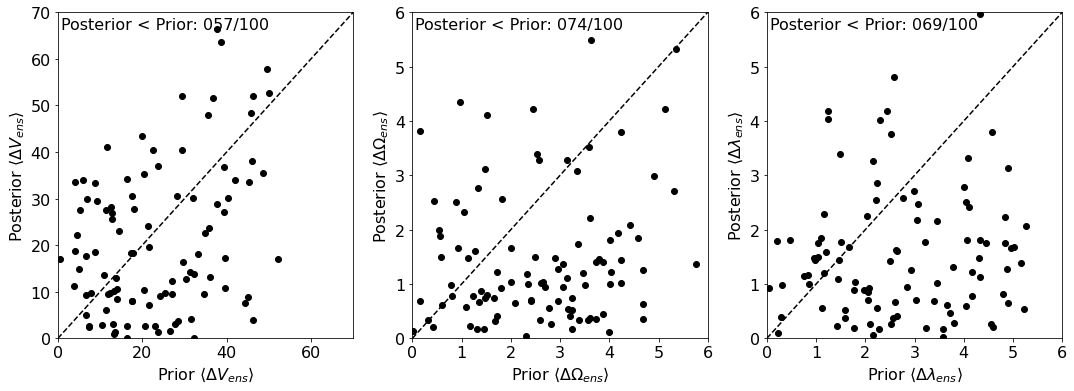

In [74]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
dv_pri = np.abs(np.array(data['prior']['v_avg']) - 1000)
dv_pos = np.abs(np.array(data['post']['v_avg']) - 1000)

count = np.sum(dv_pos < dv_pri)
tot  = dv_pos.size
print("Speed: {:03d}/{:03d}".format(count, tot))
txt = "Posterior < Prior: {:03d}/{:03d}".format(count, tot)
ax[0].text(0.01, 0.95, txt, fontsize=16, transform=ax[0].transAxes)

ax[0].plot(dv_pri, dv_pos, 'ko')
ax[0].plot([0, 100], [0, 100],'k--')
ax[0].set_xlim(0, 70)
ax[0].set_ylim(0, 70)

dw_pri = np.abs(np.array(data['prior']['width_avg']) - 35)
dw_pos = np.abs(np.array(data['post']['width_avg']) - 35)

count = np.sum(dw_pos < dw_pri)
tot = dw_pos.size
txt = "Posterior < Prior: {:03d}/{:03d}".format(count, tot)
print("Width: {:03d}/{:03d}".format(count, tot))
ax[1].text(0.01, 0.95, txt, fontsize=16, transform=ax[1].transAxes)


ax[1].plot(dw_pri, dw_pos, 'ko')
ax[1].plot([0, 100], [0, 100],'k--')
ax[1].set_xlim(0, 6)
ax[1].set_ylim(0, 6)

dl_pri = np.abs(np.array(data['prior']['lon_avg']) - 0)
dl_pos = np.abs(np.array(data['post']['lon_avg']) - 0)

count = np.sum(dl_pos < dl_pri)
tot = dl_pos.size
print("Lon: {:03d}/{:03d}".format(count, tot))
txt = "Posterior < Prior: {:03d}/{:03d}".format(count, tot)
ax[2].text(0.01, 0.95, txt, fontsize=16, transform=ax[2].transAxes)

ax[2].plot(dl_pri, dl_pos, 'ko')
ax[2].plot([0, 100], [0, 100],'k--')
ax[2].set_xlim(0, 6)
ax[2].set_ylim(0, 6)

for a, lab in zip(ax, ['V', '\\Omega', '\\lambda']):

    a.set_xlabel('Prior $\\langle \\Delta {}_{{ens}}\\rangle$'.format(lab, lab))
    a.set_ylabel('Posterior $\\langle \\Delta {}_{{ens}}\\rangle$'.format(lab, lab))
    
fig.savefig('ens_avg_scatter_shvwl_calibrate.png')


Speed: 077/100
Width: 087/100
Lon: 079/100


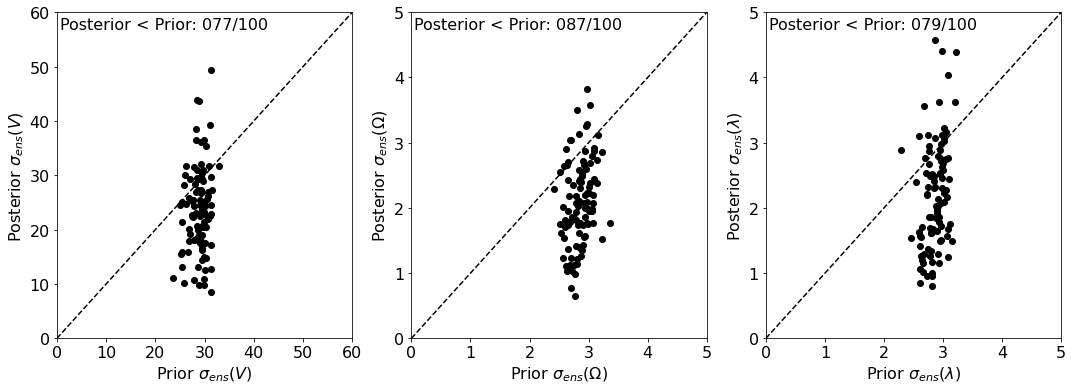

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
dv_pri = np.array(data['prior']['v_std'])
dv_pos = np.array(data['post']['v_std'])

count = np.sum(dv_pos < dv_pri)
tot  = dv_pos.size
print("Speed: {:03d}/{:03d}".format(count, tot))
txt = "Posterior < Prior: {:03d}/{:03d}".format(count, tot)
ax[0].text(0.01, 0.95, txt, fontsize=16, transform=ax[0].transAxes)

ax[0].plot(dv_pri, dv_pos, 'ko')
ax[0].plot([0, 100], [0, 100],'k--')
ax[0].set_xlim(0, 60)
ax[0].set_ylim(0, 60)

dw_pri = np.array(data['prior']['width_std'])
dw_pos = np.array(data['post']['width_std'])

count = np.sum(dw_pos < dw_pri)
tot = dw_pos.size
print("Width: {:03d}/{:03d}".format(count, tot))
txt = "Posterior < Prior: {:03d}/{:03d}".format(count, tot)
ax[1].text(0.01, 0.95, txt, fontsize=16, transform=ax[1].transAxes)

ax[1].plot(dw_pri, dw_pos, 'ko')
ax[1].plot([0, 100], [0, 100],'k--')
ax[1].set_xlim(0, 5)
ax[1].set_ylim(0, 5)

dl_pri = np.array(data['prior']['lon_std'])
dl_pos = np.array(data['post']['lon_std'])

count = np.sum(dl_pos < dl_pri)
tot = dl_pos.size
print("Lon: {:03d}/{:03d}".format(count, tot))
txt = "Posterior < Prior: {:03d}/{:03d}".format(count, tot)
ax[2].text(0.01, 0.95, txt, fontsize=16, transform=ax[2].transAxes)


ax[2].plot(dl_pri, dl_pos, 'ko')
ax[2].plot([0, 100], [0, 100],'k--')
ax[2].set_xlim(0, 5)
ax[2].set_ylim(0, 5)

for a, lab in zip(ax, ['V', '\\Omega', '\\lambda']):

    a.set_xlabel('Prior $\\sigma_{{ens}}({})$'.format(lab))
    a.set_ylabel('Posterior $\\sigma_{{ens}}({})$'.format(lab))

fig.savefig('ens_std_scatter_shvwl_calibrate.png')

In [5]:
dirs = sir.get_project_dirs()
data_dir = os.path.join(dirs['sir_analysis'], "shvwl_calibrate", "SIR_HUXt_*.hdf5")
files = glob.glob(data_dir)
#files = files[:-1]

# Get ranks and ensemble means of the priors
params = ['t_truth', 't_rank', 'dt_avg', 'dt_std']

data = {key: {param_key:[] for param_key in params} for key in ['prior', 'post']}

##############################
start_time = Time('2008-01-01T00:00:00')
cr_num = np.fix(sn.carrington_rotation_number(start_time))
ert = H.Observer('EARTH', start_time)
vr_in = np.zeros(128) + 400*u.km/u.s

# Set up HUXt for a 3.5 day simulation, outputting every dt_scale 
model = H.HUXt(v_boundary=vr_in, cr_num=cr_num, cr_lon_init=ert.lon_c, latitude=ert.lat.to(u.deg),
               lon_start=355*u.deg, lon_stop=5*u.deg, simtime=4*u.day, dt_scale=4)


for key in ['prior', 'post']:

    if key == 'prior':
        analysis_key = 'analysis_00'
    elif key == 'post':
        analysis_key = 'analysis_07'
        
    for i, f in enumerate(files): 

        out_file = h5py.File(f, 'r')
        
        cme_truth_params = out_file['truth_cme_params'][:]
        
        if i == 0:
            t_launch = cme_truth_params[0]*u.s
            lon = cme_truth_params[1]*u.rad
            lat = cme_truth_params[2]*u.rad
            width = cme_truth_params[3]*u.rad
            v = cme_truth_params[4]*(u.km/u.s)
            thick = cme_truth_params[5]*u.km

            cme = H.ConeCME(t_launch=t_launch, longitude=lon, latitude=lat, width=width, v=v,
                        thickness=thick)

            model.solve([cme])
            cme = model.cmes[0]
            hit, t_a_truth, t_t_truth, hit_lon, hit_id = cme.compute_arrival_at_body('EARTH')
            #print(hit, t_a_truth, hit_id)
            data[key]['t_truth'] = t_t_truth.value
        
        n_ens = out_file[analysis_key]['v'].size
        t_t_arr = []
        for i in range(n_ens):
            t_launch = out_file[analysis_key]['t_launch'][i]*(u.s)
            lon = out_file[analysis_key]['lon'][i]*u.deg
            lat = out_file[analysis_key]['lat'][i]*u.deg
            width = out_file[analysis_key]['width'][i]*u.deg
            v = out_file[analysis_key]['v'][i]*(u.km/u.s)
            thick = out_file[analysis_key]['thick'][i]*u.solRad
            
            cme = H.ConeCME(t_launch=t_launch, longitude=lon, latitude=lat, width=width, v=v,
                    thickness=thick)
                        
            model.solve([cme])
            cme = model.cmes[0]
            hit, t_a, t_t, hit_lon, hit_id = cme.compute_arrival_at_body('EARTH')
            t_t_arr.append(t_t.value)
            
        t_t_arr = np.array(t_t_arr)
        dt = 24*(t_t_arr - t_t_truth.value)
        data[key]['dt_avg'].append(np.mean(dt))
        data[key]['dt_std'].append(np.std(dt))
        vals_all = np.append(t_t_arr, t_t_truth.value)
        vals_ranks = st.rankdata(vals_all)
        data[key]['t_rank'].append(vals_ranks[-1])
                                  
        out_file.close()
        

-2.9499631810589797 deg


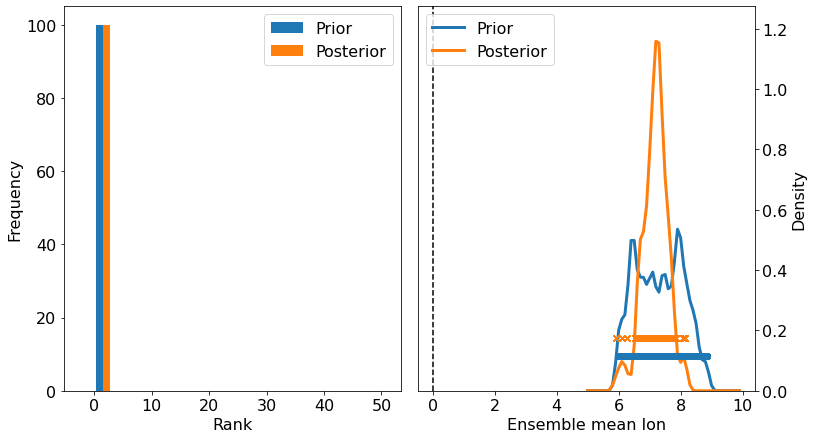

In [9]:
bins = np.arange(-3, n_ens + 3, 3)
bw = {'v':10, 'lon':1, 'width':1, 't':0.1}
grid =  {'v':np.arange(900, 1100, 1), 'lon':np.arange(-10, 10, 0.1),
         'width':np.arange(25, 45, 0.1), 't':np.arange(5, 10, 0.1)}

    
ranks = [data['prior']['t_rank'], data['post']['t_rank']]
val_pri = 24*data['prior']['dt_avg']
val_pos = 24*data['post']['dt_avg']
val_truth = 0#data['prior']['t_truth']         
fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].hist(ranks, bins=bins, label=['Prior', 'Posterior'])

cmap = plt.get_cmap("tab10")

for val, col, label in zip([val_pri, val_pos], [cmap(0), cmap(1)], ['Prior', 'Posterior']):

    kde = KernelDensity(kernel='gaussian', bandwidth=bw['t']).fit(np.array(val).reshape(-1, 1))
    log_pdf = kde.score_samples(grid['t'].reshape(-1,1))
    pdf = np.exp(log_pdf)
    ax[1].plot(grid['t'], pdf, color=col, label=label, linewidth=3)

y = np.zeros(len(val_pri)) + 0.1*np.max(pdf)    
ax[1].plot(val_pri, y, 'o', color=cmap(0))

y = np.zeros(len(val_pos)) + 0.15*np.max(pdf)    
ax[1].plot(val_pos, y, 'x', color=cmap(1))

ax[1].vlines(val_truth, 0, 2*np.max(pdf), linestyles=['--'], colors=['k'])

ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

ax[0].set_xlabel('Rank')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].set_xlabel('Ensemble mean ' + param)
ax[1].set_ylabel('Density')
ax[1].set_ylim(-0.0001, 1.1*np.max(pdf))
#ax[1].set_xlim(900, 1100)
ax[1].legend()

fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.99, wspace=0.05)
fig.savefig('rnk_hst_ens_avg_{}_shvwl_calibrate.png'.format(param))
